In [10]:
import numpy as np
# we first want to load brainspace sample data 
from brainstat.datasets import fetch_mask, fetch_template_surface
from brainstat.tutorial.utils import fetch_mics_data

# Load imaging data & behavioral markers
thickness, demographics = fetch_mics_data()
pial_left, pial_right = fetch_template_surface("fsaverage5", join=False)
pial_combined = fetch_template_surface("fsaverage5", join=True)
mask = fetch_mask("fsaverage5")

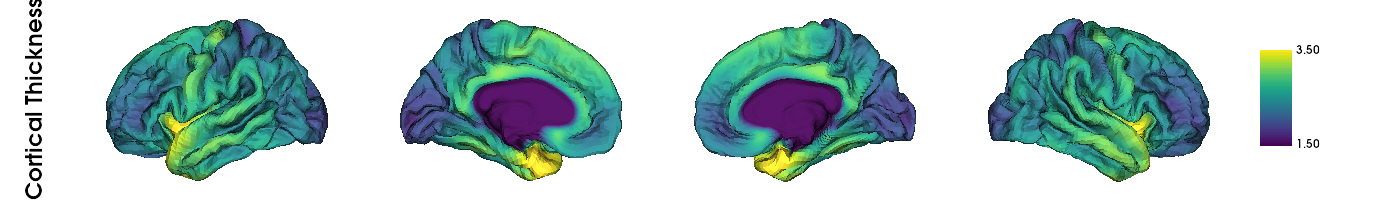

In [2]:
import numpy as np
from brainspace.plotting import plot_hemispheres


def local_plot_hemispheres(values, label_text, color_range, cmap="viridis"):
    # Plot cortical surfaces with values as the data, label_text as
    # the labels, and color_range as the limits of the color bar.
    return plot_hemispheres(
        pial_left,
        pial_right,
        values,
        color_bar=True,
        color_range=color_range,
        label_text=label_text,
        cmap=cmap,
        embed_nb=True,
        size=(1400, 200),
        zoom=1.45,
        nan_color=(0.7, 0.7, 0.7, 1),
        cb__labelTextProperty={"fontSize": 12},
        interactive=False,
    )


local_plot_hemispheres(np.mean(thickness, axis=0), ["Cortical Thickness"], (1.5, 3.5))


In [3]:
print(demographics)

    SUB_ID  VISIT  AGE_AT_SCAN SEX
0   031404      1           27   F
1   04a144      1           25   M
2   0b78f1      1           33   M
3   0d26b9      1           36   F
4   1988b8      1           31   M
..     ...    ...          ...  ..
77  f25714      1           30   F
78  f25714      2           33   F
79  f615a5      1           26   F
80  feac6b      1           26   F
81  feac6b      2           29   F

[82 rows x 4 columns]


In [4]:
from brainstat.stats.terms import FixedEffect



    intercept  AGE_AT_SCAN
0           1           27
1           1           25
2           1           33
3           1           36
4           1           31
..        ...          ...
77          1           30
78          1           33
79          1           26
80          1           26
81          1           29

[82 rows x 2 columns]


In [5]:
from brainstat.stats.SLM import SLM

contrast_age = demographics.AGE_AT_SCAN
slm_age = SLM(
    model,
    contrast_age,
    surf="fsaverage5",
    mask=mask,
    correction=["fdr", "rft"],
    cluster_threshold=0.01,
)
slm_age.fit(thickness)

In [15]:
term_age = FixedEffect(demographics.AGE_AT_SCAN)
term_sex = FixedEffect(demographics.SEX)
model = term_age + term_sex 
print(model)

import time
ti = np.empty(10)
for x in range(0, 10):
    t=time.time()
    print(x)
    contrast_age = demographics.AGE_AT_SCAN
    slm_age = SLM(
    model,
    contrast_age,
    surf="fsaverage5",
    mask=mask,
    correction=["fdr", "rft"],
    cluster_threshold=0.01,
    )
    slm_age.fit(thickness)
    ti[x] = time.time()-t
print(np.mean(ti))
print(np.std(ti))

    intercept  AGE_AT_SCAN  SEX_F  SEX_M
0           1           27      1      0
1           1           25      0      1
2           1           33      0      1
3           1           36      1      0
4           1           31      0      1
..        ...          ...    ...    ...
77          1           30      1      0
78          1           33      1      0
79          1           26      1      0
80          1           26      1      0
81          1           29      1      0

[82 rows x 4 columns]
0
1
2
3
4
5
6
7
8
9
1.9565086603164672
0.07796073066851805


[39  6 74 51 75 60 68 10 26  9 26 37 56  5 22 29 79 76 76 71 65 41 49 80
 54 49 15 68  1 17 54 26 73 52  3 39 41 33 10 10 46 56 21 57 74 35 67 35
 62 24 11 23  3 26 12 45 24 49 39 31 60  7 48 24 70 61 69  0 16 62 81 81
 24 13  3 81 56 76 14 69  5 55]


In [24]:
surr = np.random.randint(0,82,size=82)
print(surr)
ti      = np.empty(10)
ctx     = thickness[surr,]; 
agesurr = demographics.AGE_AT_SCAN[surr]
sexsurr = demographics.SEX[surr]
term_age = FixedEffect(agesurr)
term_sex = FixedEffect(sexsurr)
model = term_age + term_sex 

for x in range(0, 10):
    t=time.time()
    print(x)
    contrast_age = agesurr
    slm_age = SLM(
    model,
    contrast_age,
    surf="fsaverage5",
    mask=mask,
    correction=["fdr", "rft"],
    cluster_threshold=0.01,
    )
    slm_age.fit(ctx)
    ti[x] = time.time()-t
print(np.mean(ti))
print(np.std(ti))

0
1
2
3
4
5
6
7
8
9
2.089009714126587
0.032470241059986804


In [26]:
surr = np.random.randint(0,82,size=700)
print(surr)
ti      = np.empty(10)
ctx     = thickness[surr,]; 
agesurr = demographics.AGE_AT_SCAN[surr]
sexsurr = demographics.SEX[surr]
term_age = FixedEffect(agesurr)
term_sex = FixedEffect(sexsurr)
model = term_age + term_sex 

for x in range(0, 10):
    t=time.time()
    print(x)
    contrast_age = agesurr
    slm_age = SLM(
    model,
    contrast_age,
    surf="fsaverage5",
    mask=mask,
    correction=["fdr", "rft"],
    cluster_threshold=0.01,
    )
    slm_age.fit(ctx)
    ti[x] = time.time()-t
print(np.mean(ti))
print(np.std(ti))

[65 10 41 74 58 19 31 29 25 15 20 51 74 39 77 10 24 23 34 54 54 66 31 62
 58 22 73 72 23 28 69 62 45  1  7 30  5 23 56 28 56  4 44  5 57 58 53 30
 24 55 37 48 62 63 55 31  7 42 72 61  2 35 25 79  2 16 53 75 43 24 57 17
 23 12 66  8 22 10 36 43 56 19 53 38 61 36 25  9 63  5 34  6 70 60 24 38
 19 76 31 48 26 14 32 39 81 65 80 65 20 10 62 69 72 52 78 26  7 41  1 53
  4 37 58 75 19 43  0 42 36 37 57 19 78 61 74 18 23 67 45 59 80 47 61 28
 21 44 14  0 63 35 58 11 24 73 59 52 59 38 69 65  6 32 26 67 39 21 49 28
 37 78  4 76 12 18 41 76 51  3  2 75 43 38 34 31 49 16 76  1 32 19 63 55
  7 61 10 26 42 66 40 55  5 55 24 16 48 10 48 33 29 80 41 76 49 60 64  7
 64 50 42  9 41 66 29 67 51  0 66 47  1 23 31 77 24 70 25 40 38 73 71 31
 10  8 41 66 65  1 53 54 65  2 46 74 49 59 57 17 31  7 18 41 59 50  6 62
 44 20  0 15 62 75  7 66 27 72 30 63 64 56 65 79 78 58 42 39 17  3 79 63
 58 22  0 72 34 61 15  5 56 53 19 41 11  6  2 57 34 22 71 44 39 51 27 21
 32 51  4 51 46 28 52 73 38 16 54 43  6 45 31 20 53

In [28]:
surr = np.random.randint(0,82,size=7000)
print(surr)
ti      = np.empty(10)
ctx     = thickness[surr,]; 
agesurr = demographics.AGE_AT_SCAN[surr]
sexsurr = demographics.SEX[surr]
term_age = FixedEffect(agesurr)
term_sex = FixedEffect(sexsurr)
model = term_age + term_sex 

for x in range(0, 10):
    t=time.time()
    print(x)
    contrast_age = agesurr
    slm_age = SLM(
    model,
    contrast_age,
    surf="fsaverage5",
    mask=mask,
    correction=["fdr", "rft"],
    cluster_threshold=0.01,
    )
    slm_age.fit(ctx)
    ti[x] = time.time()-t
print(np.mean(ti))
print(np.std(ti))

[52 17 72 ...  1 51 18]
0
1
2
3
4
5
6
7
8
9
12.142390394210816
2.567325540423583
